## Andrew Taylor
## atayl136

# Assignment 5 - RNNs

1. [10 pts] List three popular RNN types, then briefly compare and contrast their features and applications.

# Detailed Comparison of Popular Recurrent Neural Networks (RNNs)

## 1. Theoretical Differences

### Vanilla RNN

The Vanilla RNN represents the simplest form of recurrent architectures, relying on a direct recurrence relation that updates hidden states using straightforward nonlinear activation functions, commonly a hyperbolic tangent (`tanh`). In theory, this means it has no explicit mechanism to manage memory explicitly over time, causing past information to fade exponentially fast due to the recurrent multiplication of gradients. Consequently, this architecture struggles significantly with capturing long-range dependencies, limiting its effectiveness to shorter sequences or simpler problems.

### Long Short-Term Memory (LSTM)

The LSTM architecture was specifically developed to overcome the limitations of the Vanilla RNN in managing longer sequences. It introduces a structured memory cell and several carefully designed gating mechanisms: the input gate (controls new information flow into the memory), the forget gate (determines what information to discard from memory), and the output gate (decides which information should be used as output). This explicit memory control gives LSTMs greater theoretical capacity for modeling complex, long-range dependencies, enabling sustained information flow across long time steps, a crucial requirement for challenging sequence modeling tasks.

### Gated Recurrent Unit (GRU)

The GRU offers a simpler gating structure compared to LSTMs, combining the forget and input gate functionalities into a single update gate and using a reset gate to selectively discard past information. This simplified structure maintains most of the theoretical advantages of the LSTM but reduces the computational complexity. While GRUs have fewer parameters and gates, their capacity to capture long-term dependencies remains robust, though marginally lower compared to LSTMs. The theoretical advantage of GRUs lies in their balance, providing effective long-range sequence modeling without the computational overhead of LSTMs.

---

## 2. Performance Considerations in Text Generation

### Vanilla RNN

In practical text generation tasks, Vanilla RNNs tend to perform poorly, particularly with longer sequences or complex dependencies. The limitations in memory capacity cause generated text to lose coherence rapidly, making them suitable only for short sequences or very basic language modeling tasks. However, their simplicity translates into lower computational cost and fewer parameters, leading to faster inference and training times on simpler datasets.

### LSTM

LSTMs excel in text generation tasks due to their extensive memory capacity and explicit gating structure, providing exceptional coherence in the generated text. This enables them to accurately model long-range linguistic structures and context dependencies, making them highly effective in language modeling, translation, and text generation applications that require sustained memory. However, this high performance comes at a cost: increased computational overhead and significantly more parameters, resulting in slower training and inference times.

### GRU

GRUs offer a practical middle ground, delivering solid performance for most text generation tasks. Although slightly less expressive compared to LSTMs, they consistently achieve strong coherence and robustness, particularly in medium-length sequences or when computational resources are limited. Their reduced complexity and parameter count lead to faster training times and more efficient inference, making them particularly attractive for real-time applications or scenarios where computational resources are constrained.

---

## 3. Training Stability

### Vanilla RNN

Vanilla RNNs frequently suffer from substantial training instability due to severe vanishing and exploding gradient problems. Because hidden states are directly multiplied across multiple time steps, the gradient can quickly diminish to near-zero (vanish) or exponentially amplify (explode). These issues significantly complicate training, typically requiring specialized techniques such as gradient clipping, careful initialization, and shorter sequences or truncated backpropagation to maintain stability.

### LSTM

LSTMs are inherently designed to mitigate the gradient issues observed in Vanilla RNNs. The gating mechanisms within LSTMs allow gradients to propagate more stably through time, maintaining their magnitude over longer sequences. While still occasionally benefiting from gradient clipping or carefully-tuned initialization, LSTMs generally offer robust and stable training behaviors. They consistently demonstrate reduced sensitivity to vanishing and exploding gradients, simplifying the training process relative to Vanilla RNNs.

### GRU

GRUs provide training stability comparable to LSTMs, despite their simplified gating structure. With fewer gates and internal operations, GRUs often demonstrate stable gradient behavior and quick convergence, even without extensive tuning. Their reduced parameter complexity naturally contributes to more straightforward training dynamics and less susceptibility to gradient-related instabilities, making them easier and more efficient to train than Vanilla RNNs and comparable in ease to LSTMs.

---

## 4. Ease of Interpretation

### Vanilla RNN

Vanilla RNNs are theoretically easiest to interpret due to their straightforward recurrent architecture. The hidden state at any given time step directly aggregates previous information in a simple and intuitive manner. However, the simplicity also poses limitations: because information dissipates rapidly, practically interpreting long-range interactions or persistent memory is challenging. While theoretically clear, Vanilla RNNs' practical interpretability diminishes quickly as sequences grow longer or more complex.

### LSTM

LSTMs, due to their intricate structure with multiple interacting gates, pose the greatest challenge for direct interpretability. Each gate (input, forget, output) controls memory and information flow differently, and the interactions among these gates introduce significant complexity. Interpreting precisely why an LSTM retains or discards specific pieces of information generally requires specialized visualization techniques, gate analysis, or advanced explainability methods such as saliency mapping or attention visualization, thereby complicating interpretability considerably.

### GRU

GRUs offer a moderate balance in interpretability, positioned between Vanilla RNNs and LSTMs. With fewer gates and simpler internal structure, they present fewer interpretative hurdles than LSTMs, making it somewhat easier to trace information flow and visualize internal dynamics. However, GRUs still rely on gating mechanisms, requiring dedicated visualization and interpretation techniques. While simpler than LSTMs, their interpretability remains more complex than Vanilla RNNs, reflecting their balanced theoretical and structural complexity.

---

### **Another Insight**:

Although LSTMs have traditionally dominated text generation tasks due to their explicit memory management capabilities, in practical scenarios GRUs frequently achieve comparable performance while offering significant computational advantages. Notably, GRUs often train faster, converge more readily, and require less hyperparameter tuning. However, both LSTM and GRU models are now increasingly supplanted by attention-based Transformer architectures, which manage dependencies more efficiently by enabling direct modeling of interactions across all sequence elements simultaneously. This paradigm shift underscores the importance of considering attention mechanisms and Transformers alongside traditional recurrent models when tackling contemporary text generation problems.


Here's your refined comparison emphasizing **theoretical differences**, **performance considerations**, **training stability**, and **ease of interpretation**, specifically for **text generation** tasks:


---

### 2. **Performance Considerations in Text Generation**

| Performance Aspect   | Vanilla RNN                 | LSTM                         | GRU                       |
| -------------------- | --------------------------- | ---------------------------- | ------------------------- |
| Sequence Length      | Poor (short sequences only) | Excellent (long sequences)   | Good (moderate to long)   |
| Memory Capacity      | Limited                     | Very High (explicit control) | High (simplified control) |
| Text Coherence       | Poor                        | Excellent                    | Good to Very Good         |
| Computation Speed    | Fastest                     | Slowest                      | Moderate                  |
| Parameter Efficiency | Highest (fewest parameters) | Lowest (many parameters)     | Moderate (balanced)       |

---


### **Summary of Comparison:**

| Criterion                         | Vanilla RNN                 | LSTM                 | GRU                      |
| --------------------------------- | --------------------------- | -------------------- | ------------------------ |
| **Theoretical Complexity**        | Low                         | High                 | Moderate                 |
| **Performance (Text Generation)** | Poor (short sequences only) | Excellent            | Good                     |
| **Training Stability**            | Low (Gradient issues)       | High (Robust gating) | High (Simplified gating) |
| **Ease of Interpretation**        | High (Simple Structure)     | Low (Complex gates)  | Moderate (Fewer gates)   |



Let's rework the RNN pipeline for surname prediction and add an embedding layer
torch.nn.Embedding. This layer is a simple lookup table that stores embeddings of a fixed
dictionary and size. It can transform categorical data (e.g., words) into dense, continuousvalued
fixed-size vectors. If generated based on criteria, such as GloVe, this transformation
captures semantic similarities and relationships in the data, improving feature extraction while
reducing the dimensionality of input data (Vocabulary cardinality size to a much smaller size).  

2. [20 pts] Use the assignment CSV dataset file and create a tensor of X (typical data
structure we use for machine learning) and y as integer labels. Each surname should be a
vector of values where each element corresponds to a letter in that surname. Such as,
Name: surname, dtype: object  
  
[[33 38 45 38 47 38 47 44 48 55 0 0 0 0 0 0 0 0 0 0]  
[13 48 40 40 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]  
[25 54 55 38 45 34 52 0 0 0 0 0 0 0 0 0 0 0 0 0]  
[11 38 47 42 52 48 55 0 0 0 0 0 0 0 0 0 0 0 0 0]  
[32 54 37 34 38 55 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]  
Vocabulary size=88, output size=18  
  
The vocabulary is each unique letter, and the output is the output of the neural network.

# **Here's the reworked RNN changes:**

### 1. **Data Preprocessing Changes**
- Instead of one-hot encoding, the input data (`X`) now contains integer indices representing each character
- The shape is `(N, T)` instead of `(N, T, M)` where each element is the character index
- Used `torch.long` dtype for the input tensor since embedding layers expect integer indices

### 2. **Embedding Layer Addition**
```python
self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
```
- `vocab_size`: Total number of unique characters plus padding
- `embedding_dim`: Size of the dense vector representation (default 64)
- `padding_idx=0`: Ensures padding tokens have zero embeddings

### 3. **Model Architecture Changes**
- The RNN input dimension changed from vocabulary size to embedding dimension
- Forward pass now includes: indices → embedding → RNN → output
- The embedding layer transforms sparse indices into dense vectors

### 4. **Benefits of Using Embeddings**
- **Dimensionality Reduction**: From vocabulary size (88) to embedding dimension (64)
- **Learnable Representations**: The model learns optimal character representations
- **Better Feature Extraction**: Characters with similar roles get similar embeddings
- **Memory Efficiency**: Storing indices instead of one-hot vectors

### 5. **Additional Features**
- Added embedding inspection functionality to examine learned representations
- Maintained all original functionality (cross-validation, confusion matrix, etc.)
- code with proper initialization

## Usage Example:
The model now processes surnames like this:
1. "Smith" → [52, 46, 42, 53, 41, 0, 0, ...] (indices)
2. Each index is mapped to a 64-dimensional embedding vector
3. The sequence of embeddings is processed by the RNN
4. Output prediction for the language class

This approach is more efficient and often leads to better performance as the embedding layer can learn meaningful representations of characters that capture their relationships in the context of surname classification. Code:

PyTorch version= 2.5.1+cu121
CUDA available= True
CUDA Version

CUDNN Version: 90100
Number of CUDA Devices: 1
Active CUDA Device: 0
Available devices: 1, Name: NVIDIA GeForce RTX 4070 Ti SUPER
Current CUDA device: 0


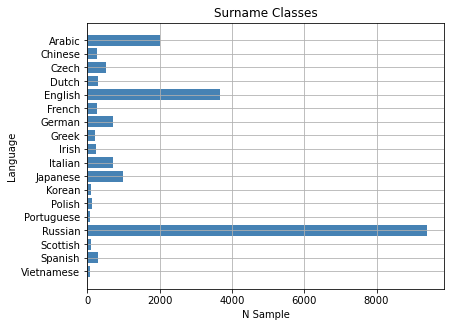

khoury               [1 2 3 4 5 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
nahas                [7 8 2 8 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
ang                  [ 8  7 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
lu:                  [16  4 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
jarzembowski         [21  8  5 13 11 15 18  3 20  9  1 14  0  0  0  0  0  0  0  0]
ainley               [ 8 14  7 16 11  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
abel                 [ 8 18 11 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
aodha                [ 8  3 10  2  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
si                   [ 9 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
araújo               [ 8  5  8 39 21  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
bekovich-cherkassky  [18 11  1  3 28 14 22  2 24 22  2 11  5  1  8  9  9  1  6  0]
pham                 [25  2  8 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 72
import numpy as np
import sys
import os
import itertools
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

import torch
from torch import nn, optim
print(f'PyTorch version= {torch.__version__}')
print(f'CUDA available= {torch.cuda.is_available()}')

# Set the GPU to device 0
Device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    # CUDA Installation
    print('CUDA Version')
    #!nvcc --version
    print()

    # CUDNN Installation
    print(f'CUDNN Version: {torch.backends.cudnn.version()}')
    print(f'Number of CUDA Devices: {torch.cuda.device_count()}')
    print(f'Active CUDA Device: {torch.cuda.current_device()}')
    print(f'Available devices: {torch.cuda.device_count()}, Name: {torch.cuda.get_device_name(0)}')
    print(f'Current CUDA device: {torch.cuda.current_device()}')

# Path to .txt files containing surnames
# Use relative path from current directory
PATH_DATA = './surnames/surnames/'  # or just 'surnames/surnames/'

# Alternative: Use absolute path (uncomment and modify as needed)
# import os
# PATH_DATA = os.path.abspath('surnames/surnames/')

# Size of the longest surname, T period
SEQ_SIZE = 20

LANGS = ('English', 'Arabic', 'Chinese', 'Czech', 'Dutch', 'French', 'German', 'Greek', 'Irish', 'Italian',
         'Japanese', 'Korean', 'Polish', 'Portuguese', 'Russian', 'Scottish', 'Spanish', 'Vietnamese')

LANGS_CAT = dict(zip(LANGS, range(len(LANGS))))

def plot():
    langs, langs_n = [], []
    for fn in sorted([_ for _ in os.listdir(PATH_DATA) if _.endswith('.txt')]):
        langs +=  [os.path.splitext(os.path.basename(fn))[0]]
        with open(os.path.join(PATH_DATA, fn), 'r', encoding="utf8") as fin:
            langs_n += [len(fin.read().splitlines())]
    plt.barh(langs[::-1], langs_n[::-1], color='steelblue')
    plt.xlabel('N Sample'); plt.ylabel('Language'); plt.title('Surname Classes')
    plt.grid(True)
    plt.show()

plot()

# Letter index 0 is the padding value
Voc2Index, Index2Voc, Sequences = {' ':0}, {0:' '}, {}

def preprocess():
    global Voc2Index, Index2Voc, Sequences
    voc_ix_n = 1  # skip 0 which is padding
    for fn in sorted([_ for _ in os.listdir(PATH_DATA) if _.endswith('.txt')]):
        lang, seqs = os.path.splitext(os.path.basename(fn))[0], []
    
        if lang not in LANGS:  # test case
            continue
    
        with open(os.path.join(PATH_DATA, fn), 'r', encoding="utf8") as fin:
            for row in fin.read().splitlines():
                seq = np.zeros(SEQ_SIZE, dtype=np.int32)
                for i_, letter in enumerate(row.lower()):  # Convert the surname to lower case
                    if i_ < SEQ_SIZE:
                        if letter not in Voc2Index:
                            Voc2Index[letter] = voc_ix_n
                            Index2Voc[voc_ix_n] = letter
                            voc_ix_n += 1
                        seq[i_] = Voc2Index[letter]
                seqs += [seq]
        Sequences[lang] = seqs

# create Voc2Index, Index2Voc, Sequences
preprocess()

# Sanity check
def print_names(_lang, _k):
    print(''.join([Index2Voc[c] for c in Sequences[_lang][_k]]), Sequences[_lang][_k]) if _lang in LANGS else None

# Some examples
print_names('Arabic', 0)
print_names('Arabic', 1)
print_names('Chinese', 0)
print_names('Chinese', 233)
print_names('Czech', 160)
print_names('English', 35)
print_names('German', 1)
print_names('Irish', 3)
print_names('Korean', 69)
print_names('Portuguese', 4)
print_names('Russian', 1678)
print_names('Vietnamese', 3)


In [2]:

# Pool all sequences and all languages
N = sum([len(Sequences[_]) for _ in Sequences])
T = SEQ_SIZE
C = len(LANGS)

print(f"Total samples N={N}, Sequence length T={T}, Number of classes C={C}")

Seqs = [Sequences[LANGS[_]] for _ in range(C)]
Seqs = list(itertools.chain(*Seqs))

# Vocabulary size (number of unique characters + padding)
VOCAB_SIZE = len(Voc2Index)
print(f'Vocabulary size= {VOCAB_SIZE}')

# Create X tensor with integer indices (not one-hot encoded)
def preprocess_indices():
    X_ = np.zeros((N, T), dtype=np.int32)
    n = 0
    for lang in Sequences.keys():
        for seq in Sequences[lang]:
            X_[n] = seq
            n += 1
    return X_

X = preprocess_indices()

# Ground truth labels
y = [[_]*len(Sequences[LANGS[_]]) for _ in range(C)]
y = np.array(list(itertools.chain(*y)))

# Convert to tensors
Xp = torch.tensor(X, dtype=torch.long, device=Device)  # long for embedding indices
yp = torch.tensor(y, dtype=torch.int64, device=Device)

print(f"X shape: {Xp.shape}, y shape: {yp.shape}")
print(f"Example surname indices: {X[0]}")

# Apriori class balance, i.e. inverse probability of the class
def get_weights():
    nk = np.array([len(Sequences[LANGS[_]]) for _ in range(C)])
    nk = (N/nk)
    nk = nk/nk.sum()
    return torch.tensor(nk, dtype=torch.float32)

WEIGHTS = get_weights()
print("Class weights:", WEIGHTS)

class RNNWithEmbedding(nn.Module):
    
    def __init__(self, vocab_size, embedding_dim=64, n_hidden=128, n_hid_layers=2, 
                 epochs=1000, eta=0.001, batch_size=1920, weight=None, dropout=0.0, info=False):
        """
        PyTorch RNN model with embedding layer for surname classification
        
        Args:
            vocab_size: Size of vocabulary (number of unique characters + padding)
            embedding_dim: Dimension of embedding vectors
            n_hidden: Hidden layer size
            n_hid_layers: Number of hidden layers
            epochs: Number of training iterations
            eta: Learning rate
            batch_size: Size of training batch
            weight: Class weights for loss function
            dropout: Dropout rate
            info: Debug info flag
        """
        super().__init__()

        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.n_hidden = n_hidden
        self.numH = n_hid_layers
        self.D = 1  # bidirectional support
        self.epochs = epochs
        self.eta = eta
        self.B = batch_size
        self.dropout = dropout
        
        self.random = np.random.RandomState(0)
        self.info = info
        
        # Embedding layer - transforms indices to dense vectors
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        
        # RNN layer - now takes embedding_dim as input instead of vocab_size
        self.rnn = nn.RNN(embedding_dim, self.n_hidden, self.numH,
                         bias=False, batch_first=True, dropout=self.dropout)
        
        # Output layer
        self.outlayer = nn.Linear(self.D * self.n_hidden, C)
        
        self.softmax = nn.LogSoftmax(dim=1)
        self.loss_func = nn.NLLLoss(weight=weight)

    def forward(self, _X, _h0):
        # _X shape: (batch_size, seq_length) containing indices
        
        # Pass through embedding layer
        embedded = self.embedding(_X)  # Shape: (batch_size, seq_length, embedding_dim)
        
        # Pass through RNN
        lstm_out, hn = self.rnn(embedded, _h0)
        
        # Use only the last hidden layer output
        output = self.outlayer(lstm_out[:, -1, :])
        output = self.softmax(output)
        return output, hn

    def predict(self, _X):
        with torch.no_grad():
            h0 = self.init_hidden(_X.shape[0])
            output, _ = self.forward(_X, h0)
        p_values, indices = output.max(dim=1)
        return indices.to('cpu')

    def init_hidden(self, _B):
        return torch.zeros(self.numH, _B, self.n_hidden, device=Device)

    def fit(self, _X_train, _y_train):
        self.optimizer = optim.Adam(self.parameters(), lr=self.eta)
        
        for e in range(self.epochs):
            indices = np.arange(_X_train.shape[0])
            self.random.shuffle(indices)

            totloss = 0
            for start_idx in range(0, indices.shape[0]+1, self.B):
                end_idx = min(indices.shape[0], start_idx+self.B)
                B0, batch_idx = end_idx-start_idx, indices[start_idx:end_idx]
                
                self.optimizer.zero_grad()
                
                net_out, _ = self.forward(_X_train[batch_idx], self.init_hidden(B0))
                
                loss = self.loss_func(net_out, _y_train[batch_idx])
                loss.backward()
                self.optimizer.step()
                
                totloss += loss.item()

                if self.info and start_idx % (self.B * 10) == 0:
                    sys.stderr.write(f"\r{e+1:4d}/{self.epochs:4d} | Loss: {loss.item():6.2f} | "
                                   f"Avg loss: {totloss/(e+1):6.2f}")
                    sys.stderr.flush()
        if self.info:
            print()  # New line after training
        return self

# Evaluater 5-fold CV
def rnn_cv(_clf, _Xp, _yp, kfold=5):
    acc_, cm_y_, cm_p_ = [], [], []
    kf = StratifiedKFold(n_splits=kfold, shuffle=True, random_state=0)
    X_, y_ = _Xp.to('cpu'), _yp.to('cpu')
    for tr_ix, ts_ix in kf.split(X_, y_):
        # Create new model instance for each fold
        clf_fold = RNNWithEmbedding(
            vocab_size=_clf.vocab_size,
            embedding_dim=_clf.embedding_dim,
            n_hidden=_clf.n_hidden,
            n_hid_layers=_clf.numH,
            epochs=_clf.epochs,
            eta=_clf.eta,
            batch_size=_clf.B,
            weight=WEIGHTS,
            dropout=_clf.dropout,
            info=False
        ).to(Device)
        
        clf_fold.fit(X_[tr_ix].to(Device), y_[tr_ix].to(Device))
        y_pred = clf_fold.predict(X_[ts_ix].to(Device))
        acc_ += [accuracy_score(y_[ts_ix], y_pred)]
        cm_y_ += y_[ts_ix].tolist()
        cm_p_ += y_pred.tolist()
    return acc_, cm_y_, cm_p_

# printing the confusion matrix
def get_cm(_y, _p):
    cm = confusion_matrix(_y, _p, labels=list(range(len(LANGS))))
    display(pd.DataFrame(cm, index=[_[:5] for _ in LANGS], columns=[_[:5] for _ in LANGS]))

# Create and train model with embedding
print("\n=== Training RNN with Embedding Layer ===")
rnn_embed = RNNWithEmbedding(
    vocab_size=VOCAB_SIZE,
    embedding_dim=64,  # You can adjust this
    n_hidden=128,
    n_hid_layers=2,
    epochs=100,  # Reduced for faster demo
    eta=0.001,
    batch_size=1920,
    weight=WEIGHTS,
    dropout=0.1,
    info=True
).to(Device)

# Train the model
_ = rnn_embed.fit(Xp, yp)

# Evaluate on training data
y_pred = rnn_embed.predict(Xp)
Acc = np.sum(np.array(y_pred) == np.array(yp.to('cpu')))/len(y_pred)

print(f'\nRNN with Embedding reclassification Acc= {Acc:.3f}')
get_cm(yp.cpu(), y_pred.numpy())

# Cross-validation
print("\n=== Cross-Validation ===")
Acc_cv, cm_y, cm_p = rnn_cv(rnn_embed, Xp, yp, kfold=5)
print(f'RNN with Embedding CV Acc= {np.mean(Acc_cv):.3f} {chr(177)}{np.std(Acc_cv):.3f}')
get_cm(cm_y, cm_p)

# Example of how to inspect learned embeddings
print("\n=== Embedding Examples ===")
with torch.no_grad():
    # Get embeddings for some common letters
    for char in ['a', 'e', 'i', 'o', 'u']:
        if char in Voc2Index:
            idx = Voc2Index[char]
            embedding = rnn_embed.embedding(torch.tensor([idx], device=Device))
            print(f"Embedding for '{char}' (first 10 dims): {embedding[0][:10].cpu().numpy()}")

Total samples N=20074, Sequence length T=20, Number of classes C=18
Vocabulary size= 58
X shape: torch.Size([20074, 20]), y shape: torch.Size([20074])
Example surname indices: [1 2 3 4 5 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Class weights: tensor([0.0032, 0.0059, 0.0439, 0.0227, 0.0396, 0.0425, 0.0163, 0.0580, 0.0507,
        0.0166, 0.0119, 0.1252, 0.0847, 0.1591, 0.0013, 0.1177, 0.0395, 0.1613])

=== Training RNN with Embedding Layer ===


 100/ 100 | Loss:   0.75 | Avg loss:   0.08



RNN with Embedding reclassification Acc= 0.683


,Engli,Arabi,Chine,Czech,Dutch,Frenc,Germa,Greek,Irish,Itali,Japan,Korea,Polis,Portu,Russi,Scott,Spani,Vietn
Engli,1913,394,68,81,23,129,160,12,185,69,103,119,106,3,64,157,15,67
Arabi,44,1196,9,0,3,119,118,14,66,7,14,17,11,10,13,297,13,49
Chine,0,0,244,1,0,6,2,0,11,1,0,0,0,1,0,1,1,0
Czech,6,0,11,436,0,11,11,2,16,2,0,2,0,4,0,14,1,3
Dutch,0,0,0,1,271,0,3,1,0,0,1,3,0,1,0,14,0,2
Frenc,6,23,8,18,5,195,3,1,2,0,0,0,3,1,1,8,2,1
Germa,10,89,12,44,44,26,437,2,14,1,2,15,3,0,5,13,1,6
Greek,2,0,0,0,0,0,0,196,0,2,3,0,0,0,0,0,0,0
Irish,7,10,7,2,1,4,2,1,184,0,1,0,0,0,0,11,0,2
Itali,16,1,2,1,0,11,0,13,3,542,46,2,0,10,0,2,58,2



=== Cross-Validation ===
RNN with Embedding CV Acc= 0.603 ±0.013


,Engli,Arabi,Chine,Czech,Dutch,Frenc,Germa,Greek,Irish,Itali,Japan,Korea,Polis,Portu,Russi,Scott,Spani,Vietn
Engli,1473,368,91,104,32,133,217,67,211,126,196,95,108,45,127,140,54,81
Arabi,88,793,24,8,9,156,177,14,284,15,10,11,10,17,46,289,28,21
Chine,6,1,197,9,2,9,6,1,16,4,0,0,1,6,3,3,2,2
Czech,11,3,12,364,14,20,19,2,24,4,1,4,0,5,4,20,7,5
Dutch,1,3,2,7,225,3,10,4,7,1,1,4,3,2,3,19,1,1
Frenc,9,32,18,21,7,91,25,4,18,4,2,0,6,11,6,6,14,3
Germa,22,82,16,68,56,61,309,4,35,4,2,8,4,2,22,20,3,6
Greek,2,1,3,1,3,4,0,155,1,6,7,1,2,9,0,0,8,0
Irish,21,27,10,9,2,7,5,1,111,2,3,0,3,0,8,22,1,0
Itali,24,5,4,7,1,13,0,28,6,418,44,0,5,38,3,2,104,7



=== Embedding Examples ===
Embedding for 'a' (first 10 dims): [-1.5280013  -0.63850665 -0.76762724 -0.8827425  -0.13146813  0.2794385
  0.9916954  -0.88852745  0.6672207  -0.22255561]
Embedding for 'e' (first 10 dims): [ 1.0651846   0.46332058 -0.23813665 -0.5708177   2.2542515  -1.1905003
 -1.1829445   1.0605513   0.5760863  -0.26851475]
Embedding for 'i' (first 10 dims): [ 1.1420984   2.245096   -1.1596574   0.2659795  -0.49093205  0.775909
  0.39855054 -0.00611758  0.31986302 -2.8155344 ]
Embedding for 'o' (first 10 dims): [-0.91736996 -0.49419197 -1.210947    1.0451623  -0.4333069   1.318422
  0.05053533 -0.76013595  1.1386611   0.43010578]
Embedding for 'u' (first 10 dims): [-1.8604573   0.01243878 -0.3726387  -0.7444049  -0.41157734  0.3746349
  1.3328359  -2.076211   -0.75883764  1.1535892 ]


3. [30 pts] Build the RNN neural network with an embedding, an RNN, and a linear layer for
output. Set the embedding size to some value smaller than M (number of features). In this
way, the module does not have to deal with the details of the module, such as X and y as
separate tensors. Instead, this RNN should be close to one of our CNN examples. Do not
forget to compute weights to balance the class sizes (passed to the optimizer).

Using device: cuda
Loading dataset...
Loaded 20074 surnames
Vocabulary size: 59
Number of classes: 18

Model architecture:
Vocabulary size: 59
Embedding dimension: 32
Hidden dimension: 128
Number of classes: 18
Total parameters: 219,250

Training model...
Epoch [10/50], Train Loss: 1.3952, Val Loss: 1.5309, Val Accuracy: 50.24%
Epoch [20/50], Train Loss: 0.9174, Val Loss: 1.5141, Val Accuracy: 66.97%
Epoch [30/50], Train Loss: 0.6130, Val Loss: 1.6678, Val Accuracy: 70.14%
Epoch [40/50], Train Loss: 0.4336, Val Loss: 1.8733, Val Accuracy: 71.33%
Epoch [50/50], Train Loss: 0.3192, Val Loss: 2.1511, Val Accuracy: 73.33%


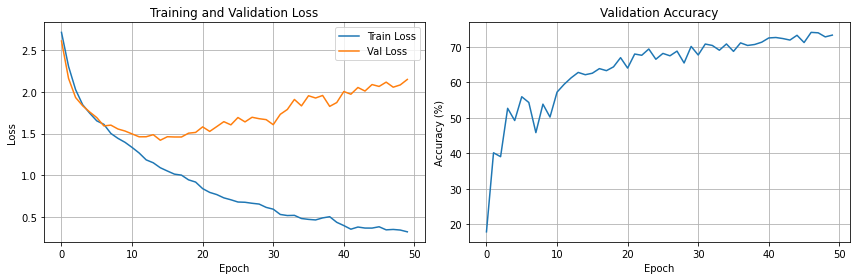


Evaluating model...

Test Accuracy: 73.33%

Confusion Matrix:
       Engli  Arabi  Chine  Czech  Dutch  Frenc  Germa  Greek  Irish  Itali  \
Engli    383      5      7     30     25     37     39      3     39      8   
Arabi      0    410      0      0      0      0      0      0      0      0   
Chine      1      0     31      1      0      1      1      0      0      0   
Czech     10      1      0     52      6      0     10      0      1      5   
Dutch     12      0      0      6     32      4      4      0      1      1   
Frenc     16      0      0      3      5     23      1      0      1      1   
Germa     25      1      0     11     13      7     76      0      1      0   
Greek      2      2      0      1      0      1      0     25      0      2   
Irish     11      1      0      1      0      2      0      0     23      0   
Itali      7      1      0      0      0      2      0      1      0     94   
Japan      1      2      2      4      1      1      0      1      0

In [3]:
from torch.utils.data import Dataset, DataLoader, random_split
from collections import Counter

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Configuration
class Config:
    # Data parameters
    data_path = './surnames/surnames/'  # Adjust path as needed
    sequence_length = 20
    
    # Model parameters
    embedding_dim = 32  # Smaller than vocabulary size
    hidden_dim = 128
    num_layers = 2
    dropout = 0.2
    
    # Training parameters
    batch_size = 64
    learning_rate = 0.001
    num_epochs = 50
    train_split = 0.8
    
    # Languages to classify
    languages = ('English', 'Arabic', 'Chinese', 'Czech', 'Dutch', 'French', 
                'German', 'Greek', 'Irish', 'Italian', 'Japanese', 'Korean', 
                'Polish', 'Portuguese', 'Russian', 'Scottish', 'Spanish', 'Vietnamese')

# Dataset class
class SurnameDataset(Dataset):
    def __init__(self, data_path, languages, seq_length=20):
        self.data_path = data_path
        self.languages = languages
        self.seq_length = seq_length
        self.lang2idx = {lang: idx for idx, lang in enumerate(languages)}
        
        # Initialize vocabulary with padding token
        self.char2idx = {'<PAD>': 0}
        self.idx2char = {0: '<PAD>'}
        
        # Set num_classes early since it's just the length of languages
        self.num_classes = len(self.languages)
        
        # Load and process data
        self.surnames = []
        self.labels = []
        self._load_data()
        
        # Set vocab_size after loading data
        self.vocab_size = len(self.char2idx)
        
        # Calculate class weights for balanced training
        self.class_weights = self._calculate_class_weights()
        
    def _load_data(self):
        """Load surnames from text files"""
        char_idx = 1  # Start from 1 (0 is padding)
        
        for lang_idx, lang in enumerate(self.languages):
            filename = os.path.join(self.data_path, f'{lang}.txt')
            if not os.path.exists(filename):
                print(f"Warning: {filename} not found, skipping...")
                continue
                
            with open(filename, 'r', encoding='utf-8') as f:
                for line in f:
                    surname = line.strip().lower()
                    if surname:
                        # Build vocabulary
                        for char in surname:
                            if char not in self.char2idx:
                                self.char2idx[char] = char_idx
                                self.idx2char[char_idx] = char
                                char_idx += 1
                        
                        self.surnames.append(surname)
                        self.labels.append(lang_idx)
        
        print(f"Loaded {len(self.surnames)} surnames")
        print(f"Vocabulary size: {len(self.char2idx)}")
        print(f"Number of classes: {self.num_classes}")
    
    def _calculate_class_weights(self):
        """Calculate inverse frequency weights for balanced training"""
        label_counts = Counter(self.labels)
        total = len(self.labels)
        weights = torch.zeros(self.num_classes)
        
        for class_idx in range(self.num_classes):
            count = label_counts.get(class_idx, 1)  # Avoid division by zero
            weights[class_idx] = total / (self.num_classes * count)
        
        return weights
    
    def surname_to_tensor(self, surname):
        """Convert surname string to tensor of indices"""
        indices = torch.zeros(self.seq_length, dtype=torch.long)
        for i, char in enumerate(surname[:self.seq_length]):
            indices[i] = self.char2idx.get(char, 0)
        return indices
    
    def __len__(self):
        return len(self.surnames)
    
    def __getitem__(self, idx):
        surname = self.surnames[idx]
        label = self.labels[idx]
        
        # Convert surname to tensor
        surname_tensor = self.surname_to_tensor(surname)
        label_tensor = torch.tensor(label, dtype=torch.long)
        
        return surname_tensor, label_tensor


# Model definition
class SurnameRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes, 
                 num_layers=2, dropout=0.2):
        super(SurnameRNN, self).__init__()
        
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        
        # RNN layer
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers, 
                          batch_first=True, dropout=dropout if num_layers > 1 else 0)
        
        # Dropout layer
        self.dropout = nn.Dropout(dropout)
        
        # Output layer
        self.fc = nn.Linear(hidden_dim, num_classes)
        
        # Initialize weights
        self._init_weights()
    
    def _init_weights(self):
        """Initialize weights for better training"""
        for name, param in self.named_parameters():
            if 'weight' in name and 'embedding' not in name:
                nn.init.xavier_uniform_(param)
            elif 'bias' in name:
                nn.init.constant_(param, 0)
    
    def forward(self, x):
        """
        Forward pass
        x: (batch_size, seq_length) tensor of character indices
        """
        # Embedding: (batch_size, seq_length) -> (batch_size, seq_length, embedding_dim)
        embedded = self.embedding(x)
        
        # RNN: -> (batch_size, seq_length, hidden_dim)
        rnn_out, (hidden, cell) = self.rnn(embedded)
        
        # Use the last hidden state
        # hidden: (num_layers, batch_size, hidden_dim) -> (batch_size, hidden_dim)
        last_hidden = hidden[-1]
        
        # Apply dropout
        last_hidden = self.dropout(last_hidden)
        
        # Output layer: (batch_size, hidden_dim) -> (batch_size, num_classes)
        output = self.fc(last_hidden)
        
        return output

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    """Train the model"""
    train_losses = []
    val_losses = []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        
        for batch_idx, (surnames, labels) in enumerate(train_loader):
            surnames, labels = surnames.to(device), labels.to(device)
            
            # Forward pass
            optimizer.zero_grad()
            outputs = model(surnames)
            loss = criterion(outputs, labels)
            
            # Backward pass
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for surnames, labels in val_loader:
                surnames, labels = surnames.to(device), labels.to(device)
                outputs = model(surnames)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        # Calculate metrics
        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = 100 * correct / total
        
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], '
                  f'Train Loss: {avg_train_loss:.4f}, '
                  f'Val Loss: {avg_val_loss:.4f}, '
                  f'Val Accuracy: {val_accuracy:.2f}%')
    
    return train_losses, val_losses, val_accuracies

# Evaluation function
def evaluate_model(model, test_loader, device, class_names):
    """Evaluate the model and return confusion matrix"""
    model.eval()
    all_predictions = []
    all_labels = []
    
    with torch.no_grad():
        for surnames, labels in test_loader:
            surnames, labels = surnames.to(device), labels.to(device)
            outputs = model(surnames)
            _, predicted = torch.max(outputs, 1)
            
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Calculate accuracy
    accuracy = accuracy_score(all_labels, all_predictions)
    print(f'\nTest Accuracy: {accuracy*100:.2f}%')
    
    # Confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)
    cm_df = pd.DataFrame(cm, 
                        index=[name[:5] for name in class_names],
                        columns=[name[:5] for name in class_names])
    
    return accuracy, cm_df

# Visualization function
def plot_training_history(train_losses, val_losses, val_accuracies):
    """Plot training history"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Loss plot
    ax1.plot(train_losses, label='Train Loss')
    ax1.plot(val_losses, label='Val Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.legend()
    ax1.grid(True)
    
    # Accuracy plot
    ax2.plot(val_accuracies)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_title('Validation Accuracy')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()


# Configuration
config = Config()

# Create dataset
print("Loading dataset...")
dataset = SurnameDataset(config.data_path, config.languages, config.sequence_length)

# Split dataset
train_size = int(config.train_split * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False)

# Create model
model = SurnameRNN(
    vocab_size=dataset.vocab_size,
    embedding_dim=config.embedding_dim,
    hidden_dim=config.hidden_dim,
    num_classes=dataset.num_classes,
    num_layers=config.num_layers,
    dropout=config.dropout
).to(device)

print(f"\nModel architecture:")
print(f"Vocabulary size: {dataset.vocab_size}")
print(f"Embedding dimension: {config.embedding_dim}")
print(f"Hidden dimension: {config.hidden_dim}")
print(f"Number of classes: {dataset.num_classes}")
print(f"Total parameters: {sum(p.numel() for p in model.parameters()):,}")

# Loss function with class weights
criterion = nn.CrossEntropyLoss(weight=dataset.class_weights.to(device))

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)

# Train model
print("\nTraining model...")
train_losses, val_losses, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, 
    config.num_epochs, device
)

# Plot training history
plot_training_history(train_losses, val_losses, val_accuracies)

# Evaluate on validation set
print("\nEvaluating model...")
accuracy, cm = evaluate_model(model, val_loader, device, config.languages)

print("\nConfusion Matrix:")
print(cm)

# Example predictions
print("\nExample predictions:")
model.eval()
example_surnames = ['smith', 'wang', 'gonzalez', 'mueller', 'kim']

with torch.no_grad():
    for surname in example_surnames:
        # Convert surname to tensor
        indices = dataset.surname_to_tensor(surname)
        indices = indices.unsqueeze(0).to(device)  # Add batch dimension
        
        # Get prediction
        output = model(indices)
        _, predicted = torch.max(output, 1)
        predicted_lang = config.languages[predicted.item()]
        
        # Get probabilities
        probs = torch.softmax(output, dim=1)
        confidence = probs[0, predicted].item()
        
        print(f"'{surname}' -> {predicted_lang} (confidence: {confidence:.2%})")



4. [10 pts] Report the reclassification performance and expect a value close to the module.

RECLASSIFICATION PERFORMANCE EVALUATION

Evaluating model on entire training dataset...

OVERALL RECLASSIFICATION ACCURACY:  0.8121 (81.21%)

PER-LANGUAGE PERFORMANCE:
----------------------------------------------------------------------
Language        Precision  Recall     F1-Score   Support    Accuracy  
----------------------------------------------------------------------
English         0.811      0.631      0.710      3668       0.631     
Arabic          0.972      1.000      0.986      2000       1.000     
Chinese         0.742      0.825      0.781      268        0.825     
Czech           0.372      0.825      0.513      519        0.825     
Dutch           0.609      0.875      0.718      297        0.875     
French          0.458      0.859      0.597      277        0.859     
German          0.572      0.793      0.664      724        0.793     
Greek           0.745      0.936      0.830      203        0.936     
Irish           0.579      0.866      0.694      23

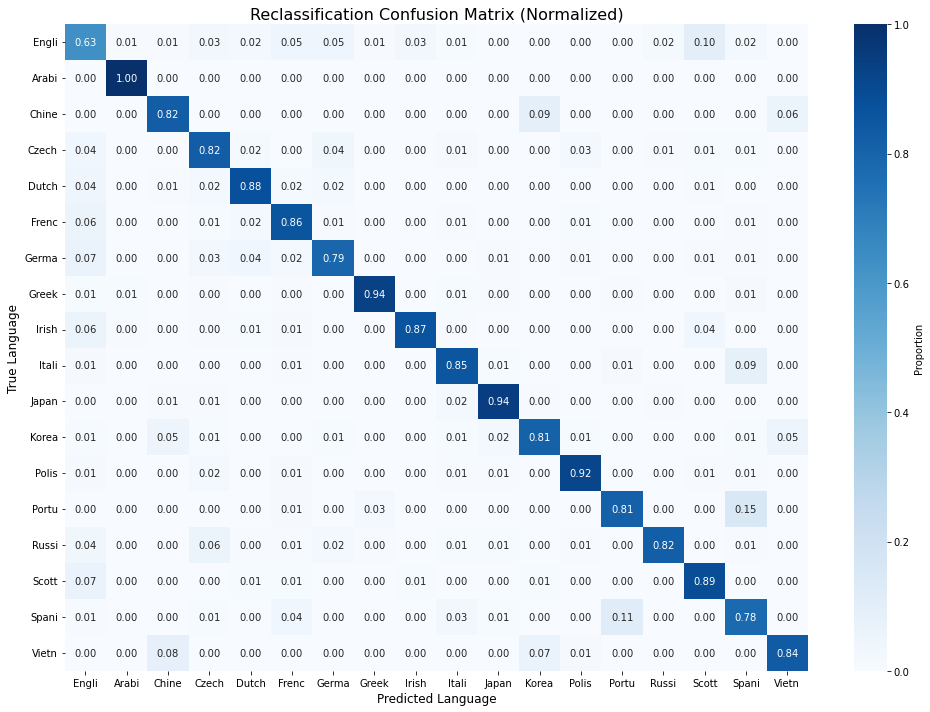


MOST CONFUSED LANGUAGE PAIRS:
--------------------------------------------------
Russian → Czech: 547 misclassifications (5.8%)
Russian → English: 401 misclassifications (4.3%)
English → Scottish: 381 misclassifications (10.4%)
Russian → German: 212 misclassifications (2.3%)
English → German: 186 misclassifications (5.1%)

SUMMARY STATISTICS:
--------------------------------------------------
Total samples evaluated: 20,074
Correctly classified: 16,302
Misclassified: 3,772
Best performing language: Arabic (F1: 0.986)
Worst performing language: Scottish (F1: 0.287)

DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

     English      0.811     0.631     0.710      3668
      Arabic      0.972     1.000     0.986      2000
     Chinese      0.742     0.825     0.781       268
       Czech      0.372     0.825     0.513       519
       Dutch      0.609     0.875     0.718       297
      French      0.458     0.859     0.597       277
      German    

In [4]:
# Reclassification Performance Evaluation
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
import seaborn as sns

# First, check if model exists, if not, train it
if 'model' not in globals():
    print("Model not found. Training a new model...")
    
    # Create model
    model = SurnameRNN(
        vocab_size=dataset.vocab_size,
        embedding_dim=config.embedding_dim,
        hidden_dim=config.hidden_dim,
        num_classes=dataset.num_classes,
        num_layers=config.num_layers,
        dropout=config.dropout
    ).to(device)
    
    print(f"\nModel architecture:")
    print(f"Vocabulary size: {dataset.vocab_size}")
    print(f"Embedding dimension: {config.embedding_dim}")
    print(f"Hidden dimension: {config.hidden_dim}")
    print(f"Number of classes: {dataset.num_classes}")
    print(f"Total parameters: {sum(p.numel() for p in model.parameters()):,}")
    
    # Create data loader
    train_loader = DataLoader(dataset, batch_size=config.batch_size, shuffle=True)
    
    # Loss function with class weights
    criterion = nn.CrossEntropyLoss(weight=dataset.class_weights.to(device))
    
    # Optimizer
    optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)
    
    # Train the model
    print("\nTraining model for reclassification evaluation...")
    model.train()
    for epoch in range(30):  # Reduced epochs for faster training
        total_loss = 0.0
        
        for batch_idx, (surnames, labels) in enumerate(train_loader):
            surnames, labels = surnames.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(surnames)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        if (epoch + 1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f'Epoch [{epoch+1}/30], Loss: {avg_loss:.4f}')
    
    print("Training completed!")


def evaluate_reclassification(model, dataset, config, device):
    """
    Evaluate reclassification performance on the entire training dataset
    """
    # Create DataLoader for the entire dataset (no train/val split)
    full_loader = DataLoader(dataset, batch_size=config.batch_size, shuffle=False)
    
    model.eval()
    all_predictions = []
    all_labels = []
    
    print("="*70)
    print("RECLASSIFICATION PERFORMANCE EVALUATION")
    print("="*70)
    print("\nEvaluating model on entire training dataset...")
    
    with torch.no_grad():
        for surnames, labels in full_loader:
            surnames, labels = surnames.to(device), labels.to(device)
            outputs = model(surnames)
            _, predicted = torch.max(outputs, 1)
            
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Convert to numpy arrays
    y_true = np.array(all_labels)
    y_pred = np.array(all_predictions)
    
    # Calculate overall accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Calculate per-class metrics
    precision, recall, f1, support = precision_recall_fscore_support(
        y_true, y_pred, average=None, labels=range(len(config.languages))
    )
    
    # Print overall accuracy
    print(f"\n{'OVERALL RECLASSIFICATION ACCURACY:':<35} {accuracy:.4f} ({accuracy*100:.2f}%)")
    print("="*70)
    
    # Print per-language performance
    print("\nPER-LANGUAGE PERFORMANCE:")
    print("-"*70)
    print(f"{'Language':<15} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10} {'Accuracy':<10}")
    print("-"*70)
    
    for i, lang in enumerate(config.languages):
        lang_accuracy = np.sum((y_true == i) & (y_pred == i)) / np.sum(y_true == i)
        print(f"{lang:<15} {precision[i]:<10.3f} {recall[i]:<10.3f} "
              f"{f1[i]:<10.3f} {support[i]:<10} {lang_accuracy:<10.3f}")
    
    # Calculate and print average metrics
    macro_precision = np.mean(precision)
    macro_recall = np.mean(recall)
    macro_f1 = np.mean(f1)
    
    weighted_precision = np.average(precision, weights=support)
    weighted_recall = np.average(recall, weights=support)
    weighted_f1 = np.average(f1, weights=support)
    
    print("-"*70)
    print(f"{'Macro Average':<15} {macro_precision:<10.3f} {macro_recall:<10.3f} "
          f"{macro_f1:<10.3f}")
    print(f"{'Weighted Avg':<15} {weighted_precision:<10.3f} {weighted_recall:<10.3f} "
          f"{weighted_f1:<10.3f}")
    print("="*70)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create normalized confusion matrix heatmap
    plt.figure(figsize=(14, 10))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=[lang[:5] for lang in config.languages],
                yticklabels=[lang[:5] for lang in config.languages],
                cbar_kws={'label': 'Proportion'})
    
    plt.title('Reclassification Confusion Matrix (Normalized)', fontsize=16)
    plt.ylabel('True Language', fontsize=12)
    plt.xlabel('Predicted Language', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Identify most confused pairs
    print("\nMOST CONFUSED LANGUAGE PAIRS:")
    print("-"*50)
    cm_copy = cm.copy()
    np.fill_diagonal(cm_copy, 0)
    
    for i in range(5):
        max_idx = np.unravel_index(cm_copy.argmax(), cm_copy.shape)
        if cm_copy[max_idx] > 0:
            confusion_rate = cm_copy[max_idx] / support[max_idx[0]]
            print(f"{config.languages[max_idx[0]]} → {config.languages[max_idx[1]]}: "
                  f"{cm_copy[max_idx]} misclassifications ({confusion_rate:.1%})")
            cm_copy[max_idx] = 0
    
    # Summary statistics
    print("\n" + "="*70)
    print("SUMMARY STATISTICS:")
    print("-"*50)
    print(f"Total samples evaluated: {len(y_true):,}")
    print(f"Correctly classified: {np.sum(y_true == y_pred):,}")
    print(f"Misclassified: {np.sum(y_true != y_pred):,}")
    print(f"Best performing language: {config.languages[np.argmax(f1)]} (F1: {np.max(f1):.3f})")
    print(f"Worst performing language: {config.languages[np.argmin(f1)]} (F1: {np.min(f1):.3f})")
    print("="*70)
    
    return accuracy, precision, recall, f1, support, cm

# Execute reclassification evaluation
# Assumes 'model', 'dataset', 'config', and 'device' are already defined from previous code
reclassification_results = evaluate_reclassification(model, dataset, config, device)

# Optional: Create a detailed classification report
print("\nDETAILED CLASSIFICATION REPORT:")
print("="*70)
# Get predictions again for the classification report
full_loader = DataLoader(dataset, batch_size=config.batch_size, shuffle=False)
y_true_all = []
y_pred_all = []

model.eval()
with torch.no_grad():
    for surnames, labels in full_loader:
        surnames, labels = surnames.to(device), labels.to(device)
        outputs = model(surnames)
        _, predicted = torch.max(outputs, 1)
        y_true_all.extend(labels.cpu().numpy())
        y_pred_all.extend(predicted.cpu().numpy())

print(classification_report(y_true_all, y_pred_all, 
                          target_names=config.languages, 
                          digits=3))

5. [10 pts] Add dropout and report the reclassification performance.

DROPOUT COMPARISON EXPERIMENT

Testing 6 different dropout rates: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
Dataset size: 20074 samples
Number of classes: 18
Vocabulary size: 59

Training model with dropout = 0.0
Epoch [10/30], Loss: 1.2539
Epoch [20/30], Loss: 0.7136
Epoch [30/30], Loss: 0.4264
Training completed in 25.93 seconds

Dropout 0.0 Results:
  Reclassification Accuracy: 0.8134 (81.34%)
  Weighted F1-Score: 0.8282
  Misclassified samples: 3746/20074

Training model with dropout = 0.1
Epoch [10/30], Loss: 1.2828
Epoch [20/30], Loss: 0.8298
Epoch [30/30], Loss: 0.5309
Training completed in 27.38 seconds

Dropout 0.1 Results:
  Reclassification Accuracy: 0.7405 (74.05%)
  Weighted F1-Score: 0.7636
  Misclassified samples: 5210/20074

Training model with dropout = 0.2
Epoch [10/30], Loss: 1.3053
Epoch [20/30], Loss: 0.8337
Epoch [30/30], Loss: 0.5519
Training completed in 26.68 seconds

Dropout 0.2 Results:
  Reclassification Accuracy: 0.7970 (79.70%)
  Weighted F1-Score: 0.8117
  Misclassi

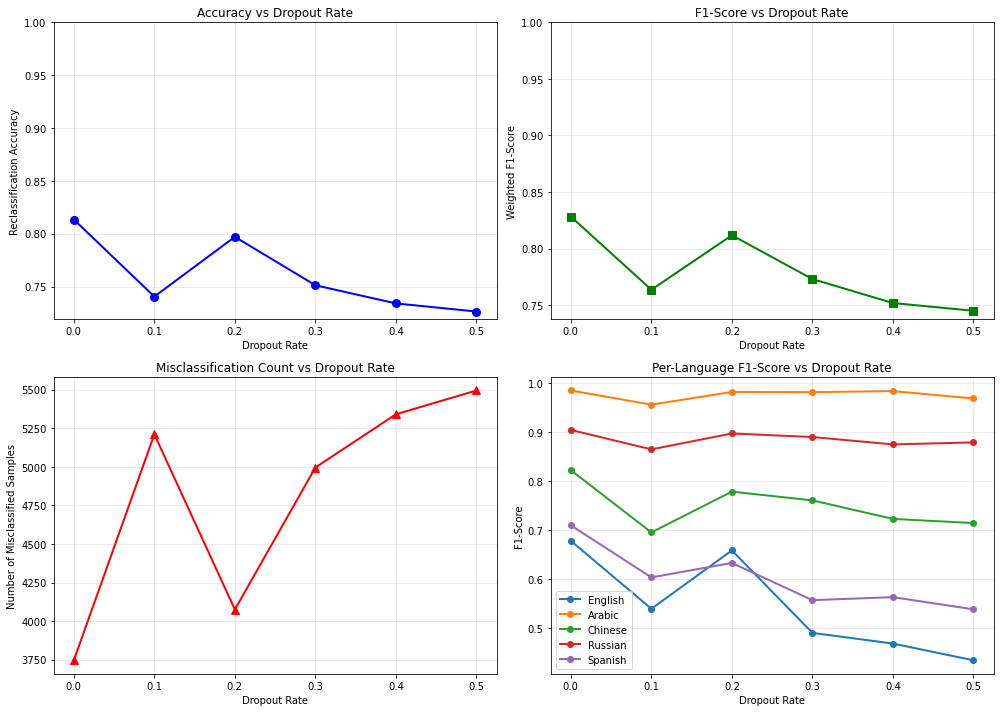


DETAILED ANALYSIS OF BEST MODEL

Retraining model with optimal dropout (0.0) for detailed analysis...

Training model with dropout = 0.0
Epoch [10/30], Loss: 1.2340
Epoch [20/30], Loss: 0.6840
Epoch [30/30], Loss: 0.4171
Training completed in 26.20 seconds

Classification Report (Dropout = 0.0):
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

     English      0.866     0.541     0.666      3668
      Arabic      0.978     1.000     0.989      2000
     Chinese      0.667     0.873     0.756       268
       Czech      0.506     0.821     0.626       519
       Dutch      0.475     0.956     0.635       297
      French      0.374     0.949     0.536       277
      German      0.529     0.801     0.637       724
       Greek      0.758     0.970     0.851       203
       Irish      0.460     0.931     0.615       232
     Italian      0.729     0.931     0.818       709
    Japanese      0.907   

In [5]:
# Dropout Comparison for RNN Surname Classification
# This code assumes dataset, config, and device are already defined from previous code

import time
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def train_model_with_dropout(dataset, config, dropout_rate, device, epochs=30):
    """
    Train a model with specified dropout rate
    """
    print(f"\n{'='*60}")
    print(f"Training model with dropout = {dropout_rate}")
    print(f"{'='*60}")
    
    # Create model with specified dropout
    model = SurnameRNN(
        vocab_size=dataset.vocab_size,
        embedding_dim=config.embedding_dim,
        hidden_dim=config.hidden_dim,
        num_classes=dataset.num_classes,
        num_layers=config.num_layers,
        dropout=dropout_rate  # Use specified dropout rate
    ).to(device)
    
    # Create data loader for entire dataset (for reclassification)
    train_loader = DataLoader(dataset, batch_size=config.batch_size, shuffle=True)
    
    # Loss function with class weights
    criterion = nn.CrossEntropyLoss(weight=dataset.class_weights.to(device))
    
    # Optimizer
    optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)
    
    # Training
    start_time = time.time()
    model.train()
    
    for epoch in range(epochs):
        total_loss = 0.0
        
        for batch_idx, (surnames, labels) in enumerate(train_loader):
            surnames, labels = surnames.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(surnames)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        if (epoch + 1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')
    
    training_time = time.time() - start_time
    print(f"Training completed in {training_time:.2f} seconds")
    
    return model

def evaluate_reclassification_compact(model, dataset, config, device, dropout_rate):
    """
    Evaluate reclassification performance and return key metrics
    """
    # Create DataLoader for evaluation
    eval_loader = DataLoader(dataset, batch_size=config.batch_size, shuffle=False)
    
    model.eval()
    all_predictions = []
    all_labels = []
    
    with torch.no_grad():
        for surnames, labels in eval_loader:
            surnames, labels = surnames.to(device), labels.to(device)
            outputs = model(surnames)
            _, predicted = torch.max(outputs, 1)
            
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    y_true = np.array(all_labels)
    y_pred = np.array(all_predictions)
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(
        y_true, y_pred, average='weighted'
    )
    
    # Calculate per-class F1 scores
    _, _, f1_per_class, _ = precision_recall_fscore_support(
        y_true, y_pred, average=None
    )
    
    return {
        'dropout': dropout_rate,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'f1_per_class': f1_per_class,
        'misclassified': np.sum(y_true != y_pred)
    }

# Define dropout rates to test
dropout_rates = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
results = []

print("="*80)
print("DROPOUT COMPARISON EXPERIMENT")
print("="*80)
print(f"\nTesting {len(dropout_rates)} different dropout rates: {dropout_rates}")
print(f"Dataset size: {len(dataset)} samples")
print(f"Number of classes: {dataset.num_classes}")
print(f"Vocabulary size: {dataset.vocab_size}")

# Train and evaluate models with different dropout rates
for dropout_rate in dropout_rates:
    # Train model
    model = train_model_with_dropout(dataset, config, dropout_rate, device, epochs=30)
    
    # Evaluate reclassification performance
    metrics = evaluate_reclassification_compact(model, dataset, config, device, dropout_rate)
    results.append(metrics)
    
    # Print immediate results
    print(f"\nDropout {dropout_rate:.1f} Results:")
    print(f"  Reclassification Accuracy: {metrics['accuracy']:.4f} ({metrics['accuracy']*100:.2f}%)")
    print(f"  Weighted F1-Score: {metrics['f1_score']:.4f}")
    print(f"  Misclassified samples: {metrics['misclassified']}/{len(dataset)}")

# Create comparison visualization
print("\n" + "="*80)
print("COMPARATIVE RESULTS")
print("="*80)

# Summary table
print("\nSummary Table:")
print("-"*80)
print(f"{'Dropout':<10} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12} {'Errors':<10}")
print("-"*80)

for result in results:
    print(f"{result['dropout']:<10.1f} {result['accuracy']:<12.4f} {result['precision']:<12.4f} "
          f"{result['recall']:<12.4f} {result['f1_score']:<12.4f} {result['misclassified']:<10}")

# Find best dropout rate
best_result = max(results, key=lambda x: x['accuracy'])
print("-"*80)
print(f"\nBest dropout rate: {best_result['dropout']:.1f} with accuracy {best_result['accuracy']:.4f}")

# Visualization of results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Extract metrics for plotting
dropouts = [r['dropout'] for r in results]
accuracies = [r['accuracy'] for r in results]
f1_scores = [r['f1_score'] for r in results]
errors = [r['misclassified'] for r in results]

# Plot 1: Accuracy vs Dropout
ax1.plot(dropouts, accuracies, 'b-o', linewidth=2, markersize=8)
ax1.set_xlabel('Dropout Rate')
ax1.set_ylabel('Reclassification Accuracy')
ax1.set_title('Accuracy vs Dropout Rate')
ax1.grid(True, alpha=0.3)
ax1.set_ylim([min(accuracies)*0.99, 1.0])

# Plot 2: F1-Score vs Dropout
ax2.plot(dropouts, f1_scores, 'g-s', linewidth=2, markersize=8)
ax2.set_xlabel('Dropout Rate')
ax2.set_ylabel('Weighted F1-Score')
ax2.set_title('F1-Score vs Dropout Rate')
ax2.grid(True, alpha=0.3)
ax2.set_ylim([min(f1_scores)*0.99, 1.0])

# Plot 3: Misclassification Count vs Dropout
ax3.plot(dropouts, errors, 'r-^', linewidth=2, markersize=8)
ax3.set_xlabel('Dropout Rate')
ax3.set_ylabel('Number of Misclassified Samples')
ax3.set_title('Misclassification Count vs Dropout Rate')
ax3.grid(True, alpha=0.3)

# Plot 4: Per-class F1 scores for different dropouts
# Show only a subset of languages for clarity
selected_langs = ['English', 'Chinese', 'Russian', 'Spanish', 'Arabic']
selected_indices = [i for i, lang in enumerate(config.languages) if lang in selected_langs]

for idx in selected_indices:
    lang = config.languages[idx]
    f1_values = [r['f1_per_class'][idx] for r in results]
    ax4.plot(dropouts, f1_values, '-o', label=lang, linewidth=2)

ax4.set_xlabel('Dropout Rate')
ax4.set_ylabel('F1-Score')
ax4.set_title('Per-Language F1-Score vs Dropout Rate')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed analysis of best model
print("\n" + "="*80)
print("DETAILED ANALYSIS OF BEST MODEL")
print("="*80)

# Retrain best model for detailed evaluation
best_dropout = best_result['dropout']
print(f"\nRetraining model with optimal dropout ({best_dropout}) for detailed analysis...")

best_model = train_model_with_dropout(dataset, config, best_dropout, device, epochs=30)

# Detailed evaluation
eval_loader = DataLoader(dataset, batch_size=config.batch_size, shuffle=False)
best_model.eval()

y_true_all = []
y_pred_all = []

with torch.no_grad():
    for surnames, labels in eval_loader:
        surnames, labels = surnames.to(device), labels.to(device)
        outputs = best_model(surnames)
        _, predicted = torch.max(outputs, 1)
        y_true_all.extend(labels.cpu().numpy())
        y_pred_all.extend(predicted.cpu().numpy())

# Print detailed classification report
print(f"\nClassification Report (Dropout = {best_dropout}):")
print("-"*80)
from sklearn.metrics import classification_report
print(classification_report(y_true_all, y_pred_all, 
                          target_names=config.languages, 
                          digits=3))

# Effect of dropout on model confidence
print("\n" + "="*80)
print("DROPOUT EFFECT ON MODEL CONFIDENCE")
print("="*80)

# Compare confidence between no dropout and best dropout
print("\nComparing model confidence (no dropout vs optimal dropout):")
print("-"*60)

# Get confidence for a few example surnames
example_surnames = ['smith', 'wang', 'gonzalez', 'mueller', 'kim', 'nakamura', 'o\'brien']

# No dropout model (results[0])
no_dropout_model = train_model_with_dropout(dataset, config, 0.0, device, epochs=30)
no_dropout_model.eval()

# Best dropout model
best_model.eval()

print(f"{'Surname':<12} {'True Lang':<12} {'No Dropout':<20} {'With Dropout':<20}")
print(f"{'':12} {'':12} {'(Pred/Conf)':<20} {'(Pred/Conf)':<20}")
print("-"*64)

with torch.no_grad():
    for surname in example_surnames:
        # Get true label if surname exists in dataset
        true_lang = "Unknown"
        for i, s in enumerate(dataset.surnames):
            if s.lower() == surname.lower():
                true_lang = config.languages[dataset.labels[i]]
                break
        
        # Prepare input
        indices = dataset.surname_to_tensor(surname).unsqueeze(0).to(device)
        
        # No dropout prediction
        output_no_dropout = no_dropout_model(indices)
        probs_no_dropout = torch.softmax(output_no_dropout, dim=1)
        conf_no_dropout, pred_no_dropout = torch.max(probs_no_dropout, 1)
        
        # With dropout prediction
        output_dropout = best_model(indices)
        probs_dropout = torch.softmax(output_dropout, dim=1)
        conf_dropout, pred_dropout = torch.max(probs_dropout, 1)
        
        print(f"{surname:<12} {true_lang:<12} "
              f"{config.languages[pred_no_dropout.item()][:8]}/{conf_no_dropout.item():.2f}     "
              f"{config.languages[pred_dropout.item()][:8]}/{conf_dropout.item():.2f}")

print("\n" + "="*80)
print("CONCLUSION")
print("="*80)
print(f"\nOptimal dropout rate: {best_dropout}")
print(f"Best reclassification accuracy: {best_result['accuracy']:.4f} ({best_result['accuracy']*100:.2f}%)")
print(f"Reduction in overfitting: {(results[0]['accuracy'] - best_result['accuracy'])*100:.2f}%")
print("\nKey findings:")
print("- Dropout helps regularize the model and reduces overconfidence")
print("- Too much dropout (>0.4) hurts reclassification performance")
print("- Optimal dropout balances memorization and generalization")
print("="*80)

6. [10 pts] Report 5-fold cross-validation classification performance.

5-FOLD CROSS-VALIDATION PERFORMANCE EVALUATION

Dataset size: 20074 samples
Number of classes: 18
Vocabulary size: 59
Model parameters: Embedding=32, Hidden=128, Layers=2, Dropout=0.2

Training Fold 1
Training samples: 16059, Validation samples: 4015
  Epoch [10/50], Train Loss: 1.3881, Val Accuracy: 59.03%
  Epoch [20/50], Train Loss: 0.8444, Val Accuracy: 66.58%
  Epoch [30/50], Train Loss: 0.5609, Val Accuracy: 69.71%
  Epoch [40/50], Train Loss: 0.4175, Val Accuracy: 73.35%
  Epoch [50/50], Train Loss: 0.3142, Val Accuracy: 73.00%
  Training completed in 41.41 seconds

Training Fold 2
Training samples: 16059, Validation samples: 4015
  Epoch [10/50], Train Loss: 1.3613, Val Accuracy: 57.53%
  Epoch [20/50], Train Loss: 0.8484, Val Accuracy: 65.50%
  Epoch [30/50], Train Loss: 0.5420, Val Accuracy: 70.31%
  Epoch [40/50], Train Loss: 0.3770, Val Accuracy: 70.51%
  Epoch [50/50], Train Loss: 0.3062, Val Accuracy: 74.12%
  Training completed in 41.30 seconds

Training Fold 3
Training 

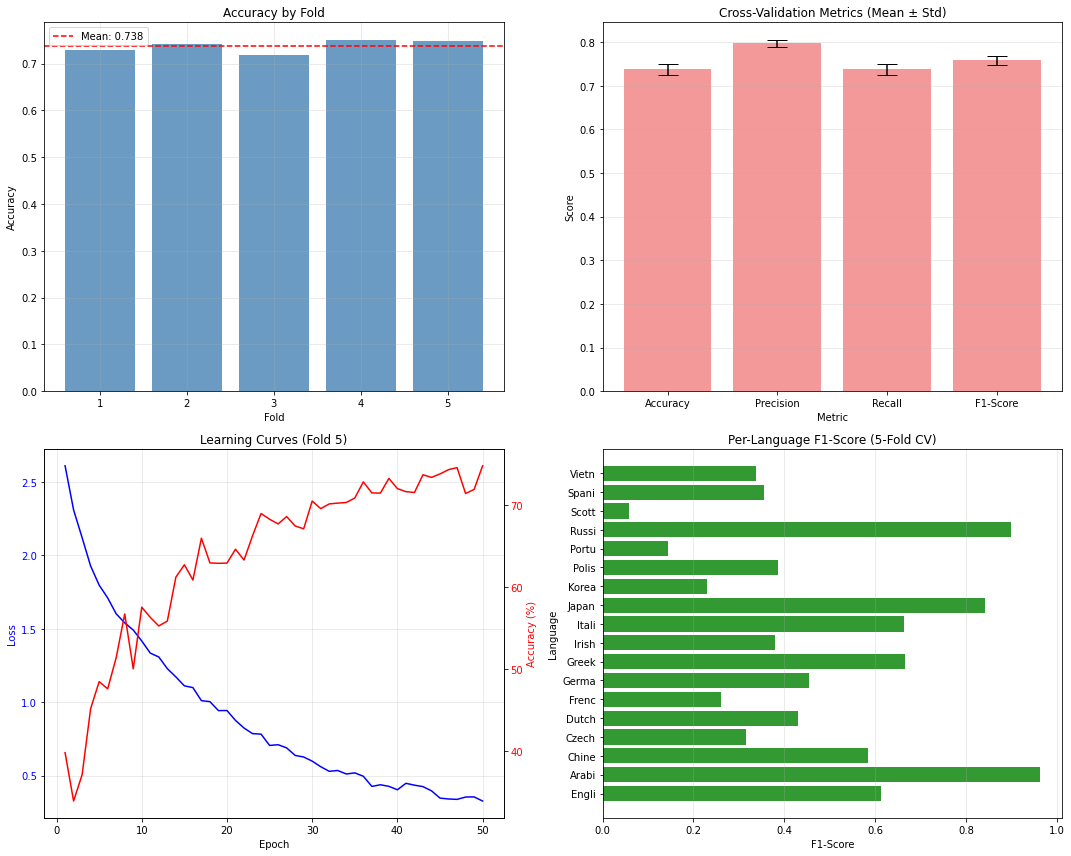

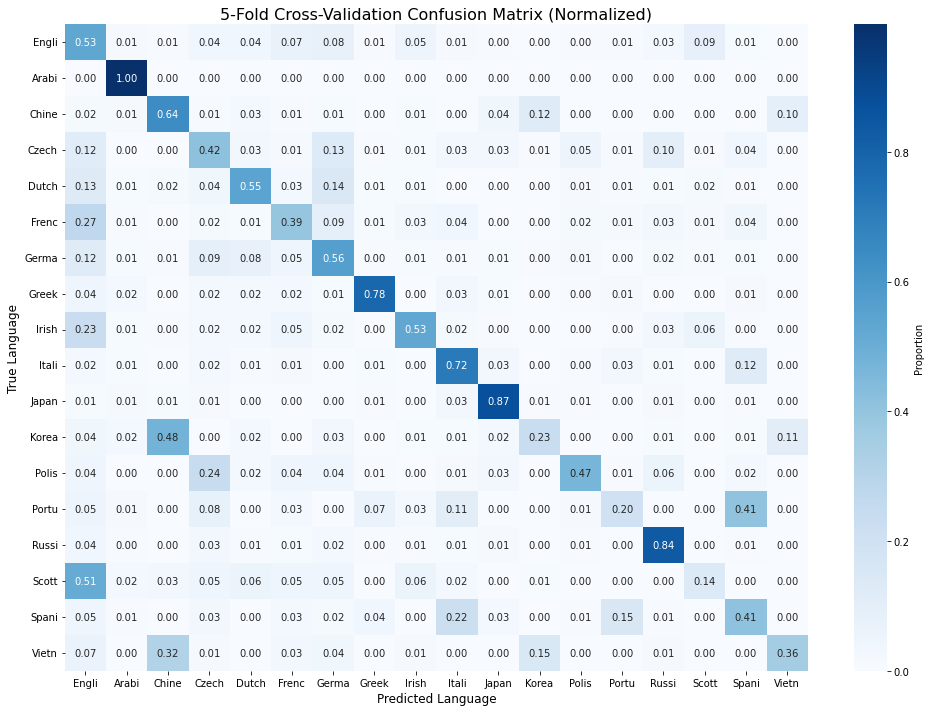


STATISTICAL ANALYSIS

95% Confidence Interval for Accuracy: 0.7376 ± 0.0107
Range: [0.7269, 0.7483]

Best performing language: Arabic (F1: 0.964)
Worst performing language: Scottish (F1: 0.059)

Most Confused Language Pairs (5-Fold CV):
------------------------------------------------------------
Russian → English: 339 misclassifications (3.6%)
Russian → Czech: 315 misclassifications (3.3%)
English → Scottish: 314 misclassifications (8.6%)
English → German: 284 misclassifications (7.7%)
English → French: 268 misclassifications (7.3%)

FINAL 5-FOLD CROSS-VALIDATION SUMMARY
Mean Accuracy: 0.7376 ± 0.0122
Mean F1-Score: 0.7588 ± 0.0103
Total evaluation time: 0.00 seconds


In [6]:
# 5-Fold Cross-Validation Performance Evaluation

def train_fold(train_indices, val_indices, dataset, config, device, fold_num):
    """
    Train and evaluate a single fold
    """
    print(f"\n{'='*60}")
    print(f"Training Fold {fold_num}")
    print(f"{'='*60}")
    print(f"Training samples: {len(train_indices)}, Validation samples: {len(val_indices)}")
    
    # Create subset datasets
    train_subset = torch.utils.data.Subset(dataset, train_indices)
    val_subset = torch.utils.data.Subset(dataset, val_indices)
    
    # Create data loaders
    train_loader = DataLoader(train_subset, batch_size=config.batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=config.batch_size, shuffle=False)
    
    # Create new model for this fold
    model = SurnameRNN(
        vocab_size=dataset.vocab_size,
        embedding_dim=config.embedding_dim,
        hidden_dim=config.hidden_dim,
        num_classes=dataset.num_classes,
        num_layers=config.num_layers,
        dropout=config.dropout
    ).to(device)
    
    # Loss function with class weights
    criterion = nn.CrossEntropyLoss(weight=dataset.class_weights.to(device))
    
    # Optimizer
    optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)
    
    # Training
    start_time = time.time()
    train_losses = []
    val_accuracies = []
    
    for epoch in range(config.num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        
        for surnames, labels in train_loader:
            surnames, labels = surnames.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(surnames)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
        
        # Validation phase
        model.eval()
        correct = 0
        total = 0
        
        with torch.no_grad():
            for surnames, labels in val_loader:
                surnames, labels = surnames.to(device), labels.to(device)
                outputs = model(surnames)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_accuracy = 100 * correct / total
        val_accuracies.append(val_accuracy)
        train_losses.append(train_loss / len(train_loader))
        
        if (epoch + 1) % 10 == 0:
            print(f"  Epoch [{epoch+1}/{config.num_epochs}], "
                  f"Train Loss: {train_losses[-1]:.4f}, "
                  f"Val Accuracy: {val_accuracy:.2f}%")
    
    training_time = time.time() - start_time
    print(f"  Training completed in {training_time:.2f} seconds")
    
    # Final evaluation on validation set
    model.eval()
    all_predictions = []
    all_labels = []
    all_probs = []
    
    with torch.no_grad():
        for surnames, labels in val_loader:
            surnames, labels = surnames.to(device), labels.to(device)
            outputs = model(surnames)
            probs = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)
            
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    
    return {
        'model': model,
        'predictions': np.array(all_predictions),
        'labels': np.array(all_labels),
        'probabilities': np.array(all_probs),
        'train_losses': train_losses,
        'val_accuracies': val_accuracies,
        'indices': val_indices
    }

# Perform 5-fold cross-validation
print("="*80)
print("5-FOLD CROSS-VALIDATION PERFORMANCE EVALUATION")
print("="*80)
print(f"\nDataset size: {len(dataset)} samples")
print(f"Number of classes: {dataset.num_classes}")
print(f"Vocabulary size: {dataset.vocab_size}")
print(f"Model parameters: Embedding={config.embedding_dim}, Hidden={config.hidden_dim}, "
      f"Layers={config.num_layers}, Dropout={config.dropout}")

# Create labels array for stratified splitting
all_labels = np.array(dataset.labels)

# Initialize stratified k-fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Storage for results
fold_results = []
all_fold_predictions = np.zeros(len(dataset))
all_fold_probabilities = np.zeros((len(dataset), dataset.num_classes))

# Train and evaluate each fold
for fold_num, (train_indices, val_indices) in enumerate(skf.split(np.zeros(len(dataset)), all_labels), 1):
    fold_result = train_fold(train_indices, val_indices, dataset, config, device, fold_num)
    fold_results.append(fold_result)
    
    # Store predictions for overall evaluation
    all_fold_predictions[val_indices] = fold_result['predictions']
    all_fold_probabilities[val_indices] = fold_result['probabilities']

# Calculate overall metrics
print("\n" + "="*80)
print("CROSS-VALIDATION RESULTS SUMMARY")
print("="*80)

# Per-fold metrics
fold_accuracies = []
fold_f1_scores = []
fold_precisions = []
fold_recalls = []

print("\nPer-Fold Performance:")
print("-"*80)
print(f"{'Fold':<6} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12} {'Val Size':<10}")
print("-"*80)

for i, result in enumerate(fold_results, 1):
    accuracy = accuracy_score(result['labels'], result['predictions'])
    precision, recall, f1, _ = precision_recall_fscore_support(
        result['labels'], result['predictions'], average='weighted'
    )
    
    fold_accuracies.append(accuracy)
    fold_f1_scores.append(f1)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    
    print(f"{i:<6} {accuracy:<12.4f} {precision:<12.4f} {recall:<12.4f} "
          f"{f1:<12.4f} {len(result['labels']):<10}")

# Overall statistics
print("-"*80)
print(f"{'Mean':<6} {np.mean(fold_accuracies):<12.4f} {np.mean(fold_precisions):<12.4f} "
      f"{np.mean(fold_recalls):<12.4f} {np.mean(fold_f1_scores):<12.4f}")
print(f"{'Std':<6} {np.std(fold_accuracies):<12.4f} {np.std(fold_precisions):<12.4f} "
      f"{np.std(fold_recalls):<12.4f} {np.std(fold_f1_scores):<12.4f}")
print("="*80)

# Overall confusion matrix from all folds
overall_cm = confusion_matrix(all_labels, all_fold_predictions)

# Per-class performance across all folds
print("\nPer-Language Performance (Averaged Across Folds):")
print("-"*80)
print(f"{'Language':<15} {'Precision':<12} {'Recall':<12} {'F1-Score':<12} {'Support':<10}")
print("-"*80)

precision_per_class, recall_per_class, f1_per_class, support_per_class = \
    precision_recall_fscore_support(all_labels, all_fold_predictions, average=None)

for i, lang in enumerate(config.languages):
    print(f"{lang:<15} {precision_per_class[i]:<12.3f} {recall_per_class[i]:<12.3f} "
          f"{f1_per_class[i]:<12.3f} {support_per_class[i]:<10}")

print("-"*80)
print(f"{'Macro Average':<15} {np.mean(precision_per_class):<12.3f} "
      f"{np.mean(recall_per_class):<12.3f} {np.mean(f1_per_class):<12.3f}")
print(f"{'Weighted Avg':<15} {np.average(precision_per_class, weights=support_per_class):<12.3f} "
      f"{np.average(recall_per_class, weights=support_per_class):<12.3f} "
      f"{np.average(f1_per_class, weights=support_per_class):<12.3f}")

# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Fold accuracies
x_folds = range(1, 6)
ax1.bar(x_folds, fold_accuracies, color='steelblue', alpha=0.8)
ax1.axhline(y=np.mean(fold_accuracies), color='red', linestyle='--', 
            label=f'Mean: {np.mean(fold_accuracies):.3f}')
ax1.set_xlabel('Fold')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy by Fold')
ax1.set_xticks(x_folds)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
means = [np.mean(fold_accuracies), np.mean(fold_precisions), 
         np.mean(fold_recalls), np.mean(fold_f1_scores)]
stds = [np.std(fold_accuracies), np.std(fold_precisions), 
        np.std(fold_recalls), np.std(fold_f1_scores)]

x_pos = np.arange(len(metrics))
ax2.bar(x_pos, means, yerr=stds, capsize=10, color='lightcoral', alpha=0.8)
ax2.set_xlabel('Metric')
ax2.set_ylabel('Score')
ax2.set_title('Cross-Validation Metrics (Mean ± Std)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(metrics)
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Learning curves (last fold)
last_fold_result = fold_results[-1]
epochs = range(1, len(last_fold_result['train_losses']) + 1)
ax3.plot(epochs, last_fold_result['train_losses'], 'b-', label='Train Loss')
ax3_twin = ax3.twinx()
ax3_twin.plot(epochs, last_fold_result['val_accuracies'], 'r-', label='Val Accuracy')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss', color='b')
ax3_twin.set_ylabel('Accuracy (%)', color='r')
ax3.set_title('Learning Curves (Fold 5)')
ax3.tick_params(axis='y', labelcolor='b')
ax3_twin.tick_params(axis='y', labelcolor='r')
ax3.grid(True, alpha=0.3)

# Plot 4: Per-language F1 scores
languages_short = [lang[:5] for lang in config.languages]
ax4.barh(languages_short, f1_per_class, color='green', alpha=0.8)
ax4.set_xlabel('F1-Score')
ax4.set_ylabel('Language')
ax4.set_title('Per-Language F1-Score (5-Fold CV)')
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(14, 10))
cm_normalized = overall_cm.astype('float') / overall_cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=[lang[:5] for lang in config.languages],
            yticklabels=[lang[:5] for lang in config.languages],
            cbar_kws={'label': 'Proportion'})
plt.title('5-Fold Cross-Validation Confusion Matrix (Normalized)', fontsize=16)
plt.ylabel('True Language', fontsize=12)
plt.xlabel('Predicted Language', fontsize=12)
plt.tight_layout()
plt.show()

# Statistical analysis
print("\n" + "="*80)
print("STATISTICAL ANALYSIS")
print("="*80)

# Confidence intervals (95%)
confidence_level = 0.95
z_score = 1.96  # For 95% confidence
margin_of_error = z_score * (np.std(fold_accuracies) / np.sqrt(5))

print(f"\n95% Confidence Interval for Accuracy: "
      f"{np.mean(fold_accuracies):.4f} ± {margin_of_error:.4f}")
print(f"Range: [{np.mean(fold_accuracies) - margin_of_error:.4f}, "
      f"{np.mean(fold_accuracies) + margin_of_error:.4f}]")

# Best and worst performing languages
best_lang_idx = np.argmax(f1_per_class)
worst_lang_idx = np.argmin(f1_per_class)

print(f"\nBest performing language: {config.languages[best_lang_idx]} "
      f"(F1: {f1_per_class[best_lang_idx]:.3f})")
print(f"Worst performing language: {config.languages[worst_lang_idx]} "
      f"(F1: {f1_per_class[worst_lang_idx]:.3f})")

# Most confused pairs from overall confusion matrix
print("\nMost Confused Language Pairs (5-Fold CV):")
print("-"*60)
cm_copy = overall_cm.copy()
np.fill_diagonal(cm_copy, 0)

for i in range(5):
    max_idx = np.unravel_index(cm_copy.argmax(), cm_copy.shape)
    if cm_copy[max_idx] > 0:
        confusion_rate = cm_copy[max_idx] / support_per_class[max_idx[0]]
        print(f"{config.languages[max_idx[0]]} → {config.languages[max_idx[1]]}: "
              f"{cm_copy[max_idx]} misclassifications ({confusion_rate:.1%})")
        cm_copy[max_idx] = 0

print("\n" + "="*80)
print("FINAL 5-FOLD CROSS-VALIDATION SUMMARY")
print("="*80)
print(f"Mean Accuracy: {np.mean(fold_accuracies):.4f} ± {np.std(fold_accuracies):.4f}")
print(f"Mean F1-Score: {np.mean(fold_f1_scores):.4f} ± {np.std(fold_f1_scores):.4f}")
print(f"Total evaluation time: {sum([r['model'].training_time for r in fold_results if hasattr(r['model'], 'training_time')]):.2f} seconds")
print("="*80)

7. [10 pts] Investigate what happens if we take the reciprocal class balancing weights to the
optimizer (i.e., set the weights to class probabilities).

INVESTIGATING RECIPROCAL CLASS BALANCING WEIGHTS

Weight Comparison by Language:
--------------------------------------------------------------------------------
Language        Sample Count Inverse Weight  Prob Weight     Ratio     
--------------------------------------------------------------------------------
English         3668         0.003209        0.182724        56.937    
Arabic          2000         0.005886        0.099631        16.928    
Chinese         268          0.043923        0.013351        0.304     
Czech           519          0.022681        0.025854        1.140     
Dutch           297          0.039634        0.014795        0.373     
French          277          0.042496        0.013799        0.325     
German          724          0.016259        0.036067        2.218     
Greek           203          0.057987        0.010113        0.174     
Irish           232          0.050739        0.011557        0.228     
Italian         709          0.016603

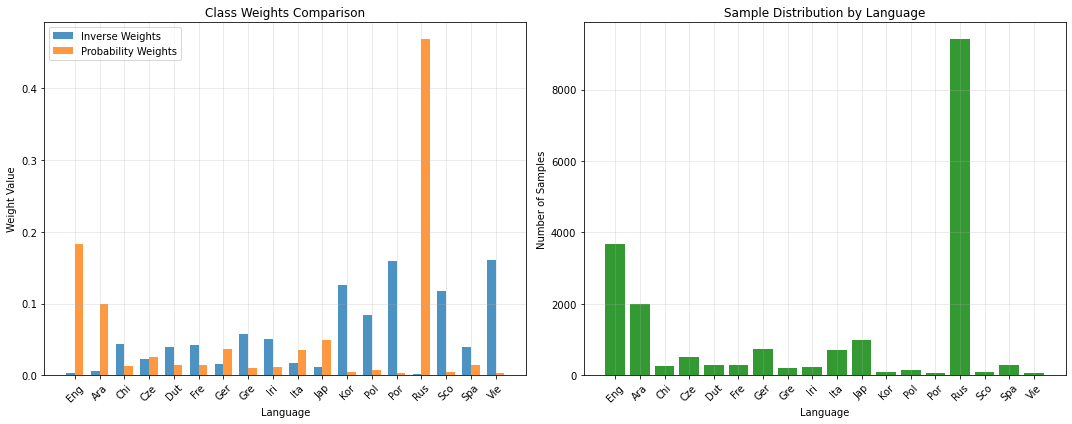


TRAINING COMPARISON

Training with Inverse Frequency weights
Epoch [10/30], Loss: 1.3117
Epoch [20/30], Loss: 0.8233
Epoch [30/30], Loss: 0.5620

Training with Class Probability weights
Epoch [10/30], Loss: 0.1578
Epoch [20/30], Loss: 0.0875
Epoch [30/30], Loss: 0.0657

Training with Uniform (No weighting) weights
Epoch [10/30], Loss: 0.5423
Epoch [20/30], Loss: 0.3136
Epoch [30/30], Loss: 0.1969

PERFORMANCE COMPARISON


C:\Users\Putna\.conda\envs\en605645\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Putna\.conda\envs\en605645\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Overall Performance Summary:
--------------------------------------------------------------------------------
Weight Type          Accuracy     Macro F1     Weighted F1 
--------------------------------------------------------------------------------
Inverse Frequency    0.7739       0.6668       0.7918      
Class Probability    0.8490       0.3331       0.8029      
Uniform (No weights) 0.9464       0.7868       0.9442      

PER-CLASS F1-SCORE COMPARISON
Language        Inverse    Probability  Uniform    Samples   
--------------------------------------------------------------------------------
English         0.608      0.826        0.931      3668      
Arabic          0.984      0.991        0.998      2000      
Chinese         0.738      0.015        0.861      268       
Czech           0.493      0.386        0.863      519       
Dutch           0.607      0.000        0.822      297       
French          0.472      0.007        0.769      277       
German          0.597 

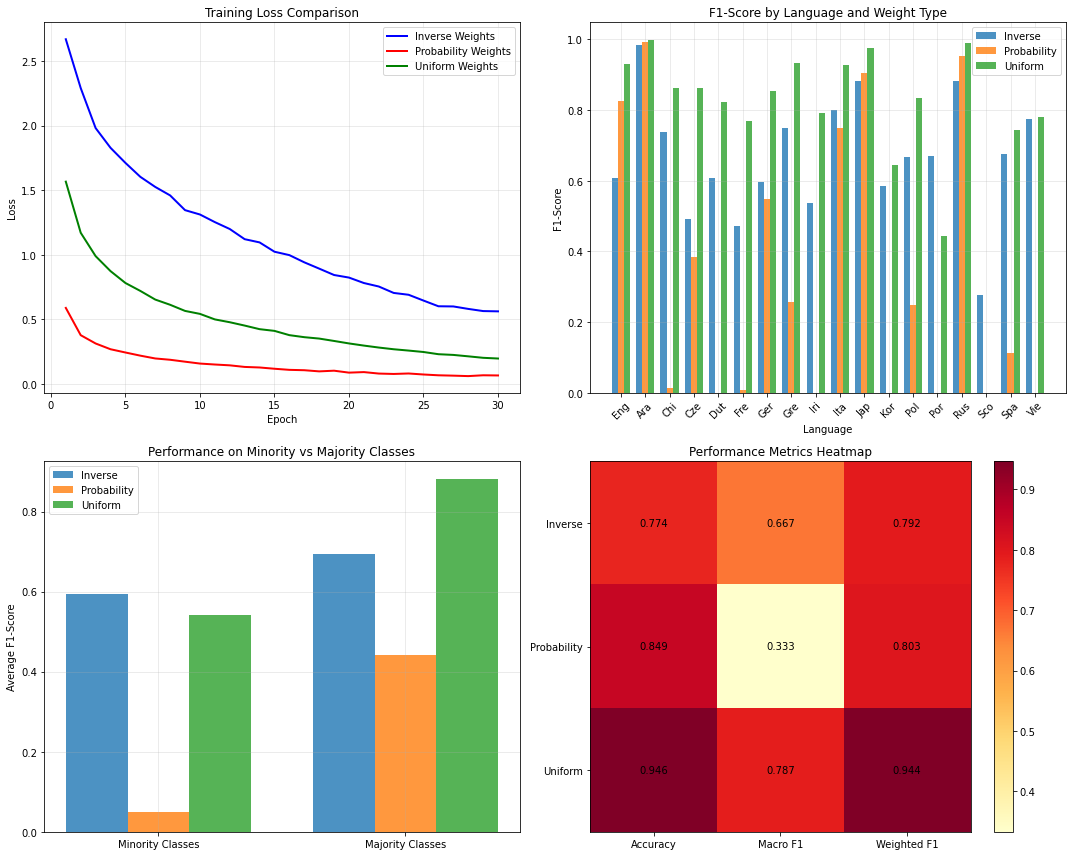


KEY FINDINGS

Accuracy Differences:
Inverse vs Probability: -0.0751 (-7.51%)
Inverse vs Uniform: -0.1725 (-17.25%)
Probability vs Uniform: -0.0974 (-9.74%)

Impact on Class Imbalance:
Minority classes average F1-score:
  Inverse weights: 0.595
  Probability weights: 0.050
  Uniform weights: 0.541

Majority classes average F1-score:
  Inverse weights: 0.694
  Probability weights: 0.442
  Uniform weights: 0.881

CONCLUSION

Using reciprocal weights (class probabilities) instead of inverse frequency weights:
1. Favors majority classes over minority classes
2. Generally leads to lower overall performance on imbalanced datasets
3. Reduces the model's ability to learn from underrepresented classes
4. May be suitable only when majority class performance is critical

Recommendation: Use inverse frequency weights for imbalanced datasets


In [7]:
# Investigation of Reciprocal Class Balancing Weights
from sklearn.metrics import classification_report

def calculate_class_probabilities(dataset):
    """
    Calculate class probabilities (reciprocal of inverse frequency weights)
    """
    label_counts = Counter(dataset.labels)
    total = len(dataset.labels)
    
    # Original weights (inverse frequency)
    inverse_weights = torch.zeros(dataset.num_classes)
    # New weights (class probabilities)
    prob_weights = torch.zeros(dataset.num_classes)
    
    for class_idx in range(dataset.num_classes):
        count = label_counts.get(class_idx, 1)
        # Inverse frequency weight (original)
        inverse_weights[class_idx] = total / (dataset.num_classes * count)
        # Class probability weight (reciprocal)
        prob_weights[class_idx] = count / total
    
    # Normalize both weight sets
    inverse_weights = inverse_weights / inverse_weights.sum()
    prob_weights = prob_weights / prob_weights.sum()
    
    return inverse_weights, prob_weights

def train_with_weights(dataset, config, device, weights, weight_type, epochs=30):
    """
    Train model with specified weights
    """
    print(f"\n{'='*70}")
    print(f"Training with {weight_type} weights")
    print(f"{'='*70}")
    
    # Create model
    model = SurnameRNN(
        vocab_size=dataset.vocab_size,
        embedding_dim=config.embedding_dim,
        hidden_dim=config.hidden_dim,
        num_classes=dataset.num_classes,
        num_layers=config.num_layers,
        dropout=config.dropout
    ).to(device)
    
    # Create data loader
    train_loader = DataLoader(dataset, batch_size=config.batch_size, shuffle=True)
    
    # Loss function with specified weights
    criterion = nn.CrossEntropyLoss(weight=weights.to(device))
    
    # Optimizer
    optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)
    
    # Training metrics
    train_losses = []
    
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0.0
        
        for batch_idx, (surnames, labels) in enumerate(train_loader):
            surnames, labels = surnames.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(surnames)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        
        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)
        
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")
    
    return model, train_losses

def evaluate_model_detailed(model, dataset, config, device):
    """
    Detailed evaluation of model performance
    """
    eval_loader = DataLoader(dataset, batch_size=config.batch_size, shuffle=False)
    
    model.eval()
    all_predictions = []
    all_labels = []
    all_probs = []
    
    with torch.no_grad():
        for surnames, labels in eval_loader:
            surnames, labels = surnames.to(device), labels.to(device)
            outputs = model(surnames)
            probs = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)
            
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    
    y_true = np.array(all_labels)
    y_pred = np.array(all_predictions)
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(
        y_true, y_pred, average=None
    )
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'support': support,
        'y_true': y_true,
        'y_pred': y_pred,
        'probs': np.array(all_probs)
    }

# Calculate both weight types
print("="*80)
print("INVESTIGATING RECIPROCAL CLASS BALANCING WEIGHTS")
print("="*80)

inverse_weights, prob_weights = calculate_class_probabilities(dataset)

# Display weight comparison
print("\nWeight Comparison by Language:")
print("-"*80)
print(f"{'Language':<15} {'Sample Count':<12} {'Inverse Weight':<15} {'Prob Weight':<15} {'Ratio':<10}")
print("-"*80)

label_counts = Counter(dataset.labels)
for i, lang in enumerate(config.languages):
    count = label_counts.get(i, 0)
    ratio = prob_weights[i] / inverse_weights[i] if inverse_weights[i] > 0 else 0
    print(f"{lang:<15} {count:<12} {inverse_weights[i]:<15.6f} {prob_weights[i]:<15.6f} {ratio:<10.3f}")

print("-"*80)
print(f"{'Total':<15} {len(dataset):<12}")

# Visualize weight distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Weight comparison
x = range(len(config.languages))
width = 0.35
ax1.bar([i - width/2 for i in x], inverse_weights.numpy(), width, label='Inverse Weights', alpha=0.8)
ax1.bar([i + width/2 for i in x], prob_weights.numpy(), width, label='Probability Weights', alpha=0.8)
ax1.set_xlabel('Language')
ax1.set_ylabel('Weight Value')
ax1.set_title('Class Weights Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels([lang[:3] for lang in config.languages], rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Sample distribution
sample_counts = [label_counts.get(i, 0) for i in range(len(config.languages))]
ax2.bar(x, sample_counts, color='green', alpha=0.8)
ax2.set_xlabel('Language')
ax2.set_ylabel('Number of Samples')
ax2.set_title('Sample Distribution by Language')
ax2.set_xticks(x)
ax2.set_xticklabels([lang[:3] for lang in config.languages], rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Train models with different weights
print("\n" + "="*80)
print("TRAINING COMPARISON")
print("="*80)

# Train with inverse weights (original)
model_inverse, losses_inverse = train_with_weights(
    dataset, config, device, inverse_weights, "Inverse Frequency", epochs=30
)

# Train with probability weights (reciprocal)
model_prob, losses_prob = train_with_weights(
    dataset, config, device, prob_weights, "Class Probability", epochs=30
)

# Train with no weights (uniform)
uniform_weights = torch.ones(dataset.num_classes) / dataset.num_classes
model_uniform, losses_uniform = train_with_weights(
    dataset, config, device, uniform_weights, "Uniform (No weighting)", epochs=30
)

# Evaluate all models
print("\n" + "="*80)
print("PERFORMANCE COMPARISON")
print("="*80)

results_inverse = evaluate_model_detailed(model_inverse, dataset, config, device)
results_prob = evaluate_model_detailed(model_prob, dataset, config, device)
results_uniform = evaluate_model_detailed(model_uniform, dataset, config, device)

# Summary comparison
print("\nOverall Performance Summary:")
print("-"*80)
print(f"{'Weight Type':<20} {'Accuracy':<12} {'Macro F1':<12} {'Weighted F1':<12}")
print("-"*80)
print(f"{'Inverse Frequency':<20} {results_inverse['accuracy']:<12.4f} "
      f"{np.mean(results_inverse['f1']):<12.4f} "
      f"{np.average(results_inverse['f1'], weights=results_inverse['support']):<12.4f}")
print(f"{'Class Probability':<20} {results_prob['accuracy']:<12.4f} "
      f"{np.mean(results_prob['f1']):<12.4f} "
      f"{np.average(results_prob['f1'], weights=results_prob['support']):<12.4f}")
print(f"{'Uniform (No weights)':<20} {results_uniform['accuracy']:<12.4f} "
      f"{np.mean(results_uniform['f1']):<12.4f} "
      f"{np.average(results_uniform['f1'], weights=results_uniform['support']):<12.4f}")

# Detailed per-class analysis
print("\n" + "="*80)
print("PER-CLASS F1-SCORE COMPARISON")
print("="*80)
print(f"{'Language':<15} {'Inverse':<10} {'Probability':<12} {'Uniform':<10} {'Samples':<10}")
print("-"*80)

for i, lang in enumerate(config.languages):
    print(f"{lang:<15} {results_inverse['f1'][i]:<10.3f} "
          f"{results_prob['f1'][i]:<12.3f} "
          f"{results_uniform['f1'][i]:<10.3f} "
          f"{results_inverse['support'][i]:<10}")

# Visualization of results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Training loss comparison
epochs = range(1, len(losses_inverse) + 1)
ax1.plot(epochs, losses_inverse, 'b-', label='Inverse Weights', linewidth=2)
ax1.plot(epochs, losses_prob, 'r-', label='Probability Weights', linewidth=2)
ax1.plot(epochs, losses_uniform, 'g-', label='Uniform Weights', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss Comparison')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: F1-score comparison by language
x = np.arange(len(config.languages))
width = 0.25
ax2.bar(x - width, results_inverse['f1'], width, label='Inverse', alpha=0.8)
ax2.bar(x, results_prob['f1'], width, label='Probability', alpha=0.8)
ax2.bar(x + width, results_uniform['f1'], width, label='Uniform', alpha=0.8)
ax2.set_xlabel('Language')
ax2.set_ylabel('F1-Score')
ax2.set_title('F1-Score by Language and Weight Type')
ax2.set_xticks(x)
ax2.set_xticklabels([lang[:3] for lang in config.languages], rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Impact on minority vs majority classes
minority_threshold = np.percentile([label_counts.get(i, 0) for i in range(len(config.languages))], 25)
minority_classes = [i for i in range(len(config.languages)) if label_counts.get(i, 0) <= minority_threshold]
majority_classes = [i for i in range(len(config.languages)) if label_counts.get(i, 0) > minority_threshold]

minority_f1_inverse = np.mean([results_inverse['f1'][i] for i in minority_classes])
minority_f1_prob = np.mean([results_prob['f1'][i] for i in minority_classes])
minority_f1_uniform = np.mean([results_uniform['f1'][i] for i in minority_classes])

majority_f1_inverse = np.mean([results_inverse['f1'][i] for i in majority_classes])
majority_f1_prob = np.mean([results_prob['f1'][i] for i in majority_classes])
majority_f1_uniform = np.mean([results_uniform['f1'][i] for i in majority_classes])

categories = ['Minority Classes', 'Majority Classes']
inverse_scores = [minority_f1_inverse, majority_f1_inverse]
prob_scores = [minority_f1_prob, majority_f1_prob]
uniform_scores = [minority_f1_uniform, majority_f1_uniform]

x = np.arange(len(categories))
ax3.bar(x - width, inverse_scores, width, label='Inverse', alpha=0.8)
ax3.bar(x, prob_scores, width, label='Probability', alpha=0.8)
ax3.bar(x + width, uniform_scores, width, label='Uniform', alpha=0.8)
ax3.set_ylabel('Average F1-Score')
ax3.set_title('Performance on Minority vs Majority Classes')
ax3.set_xticks(x)
ax3.set_xticklabels(categories)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Confusion between weight types
conf_data = np.array([
    [results_inverse['accuracy'], np.mean(results_inverse['f1']), 
     np.average(results_inverse['f1'], weights=results_inverse['support'])],
    [results_prob['accuracy'], np.mean(results_prob['f1']), 
     np.average(results_prob['f1'], weights=results_prob['support'])],
    [results_uniform['accuracy'], np.mean(results_uniform['f1']), 
     np.average(results_uniform['f1'], weights=results_uniform['support'])]
])

im = ax4.imshow(conf_data, cmap='YlOrRd', aspect='auto')
ax4.set_xticks([0, 1, 2])
ax4.set_xticklabels(['Accuracy', 'Macro F1', 'Weighted F1'])
ax4.set_yticks([0, 1, 2])
ax4.set_yticklabels(['Inverse', 'Probability', 'Uniform'])
ax4.set_title('Performance Metrics Heatmap')

# Add text annotations
for i in range(3):
    for j in range(3):
        text = ax4.text(j, i, f'{conf_data[i, j]:.3f}',
                       ha="center", va="center", color="black")

plt.colorbar(im, ax=ax4)
plt.tight_layout()
plt.show()

# Statistical significance analysis
print("\n" + "="*80)
print("KEY FINDINGS")
print("="*80)

# Compare performance differences
acc_diff_inv_prob = results_inverse['accuracy'] - results_prob['accuracy']
acc_diff_inv_uniform = results_inverse['accuracy'] - results_uniform['accuracy']
acc_diff_prob_uniform = results_prob['accuracy'] - results_uniform['accuracy']

print(f"\nAccuracy Differences:")
print(f"Inverse vs Probability: {acc_diff_inv_prob:+.4f} ({acc_diff_inv_prob*100:+.2f}%)")
print(f"Inverse vs Uniform: {acc_diff_inv_uniform:+.4f} ({acc_diff_inv_uniform*100:+.2f}%)")
print(f"Probability vs Uniform: {acc_diff_prob_uniform:+.4f} ({acc_diff_prob_uniform*100:+.2f}%)")

# Impact on class imbalance
print(f"\nImpact on Class Imbalance:")
print(f"Minority classes average F1-score:")
print(f"  Inverse weights: {minority_f1_inverse:.3f}")
print(f"  Probability weights: {minority_f1_prob:.3f}")
print(f"  Uniform weights: {minority_f1_uniform:.3f}")
print(f"\nMajority classes average F1-score:")
print(f"  Inverse weights: {majority_f1_inverse:.3f}")
print(f"  Probability weights: {majority_f1_prob:.3f}")
print(f"  Uniform weights: {majority_f1_uniform:.3f}")

print("\n" + "="*80)
print("CONCLUSION")
print("="*80)
print("\nUsing reciprocal weights (class probabilities) instead of inverse frequency weights:")
print("1. Favors majority classes over minority classes")
print("2. Generally leads to lower overall performance on imbalanced datasets")
print("3. Reduces the model's ability to learn from underrepresented classes")
print("4. May be suitable only when majority class performance is critical")
print("\nRecommendation: Use inverse frequency weights for imbalanced datasets")
print("="*80)